In [2]:
import json
import pandas as pd

# Read file
jsonFile = open('searchResults.json', 'r')
jsonData = jsonFile.read()

In [3]:
# Load the value that contains all relevant data
jsonDict = json.loads(jsonData)
dataDict = jsonDict['data']

In [4]:
# Open file for writing output
outputFile = open("ClassEnrollment.csv", "w")

In [5]:
# Begin by writing to the output .csv file the HEADERS
outputFile.write("Course ID,Sec,Lab Days,Lab Time,Cap,Size,Rem,Instructor,Lab Room\n" )

65

In [6]:
# Function to fill days for LEC, LAB, etc...
# 'x' is the json object 'meetingTime'
def add_days(x):
    days = ""
    
    noDaysProvided = True
    
    # Add all present days and keep track of whether the lab has any days provided
    if x['monday']:
        days += "M"
        noDaysProvided = False
    if x['tuesday']:
        days += "T"
        noDaysProvided = False
    if x['wednesday']:
        days += "W"
        noDaysProvided = False
    if x['thursday']:
        days += "R"
        noDaysProvided = False
    if x['friday']:
        days += "F"
        noDaysProvided = False
    if x['saturday']:
        days += "S"
        noDaysProvided = False
    if x['sunday']:
        days += "U"
        noDaysProvided = False
    
    # if the lab has no days, write N/A
    if noDaysProvided:
        days += "N/A"
    
    # Separate days from time for .csv
    days += ","
    
    if x['beginTime']:
        days += x["beginTime"] + " - " + x["endTime"]
    else:
        days += "N/A"
    return days

In [7]:
# Quick function to add lab days and times
def add_lab(meetingsFaculty):
    val = ""
    
    # search through all "meetingTimes" to find type "LAB"
    for facultyObject in meetingsFaculty: 
        x = facultyObject["meetingTime"]
        if x["meetingType"] == "LAB":
            val += add_days(x)
            return val
    
    # This course has no LAB so n/a for DAYS, TIMES
    val += "N/A,N/A"
    return val

In [8]:
# Quick function to add lecture days and times
def add_lec(meetingsFaculty):
    val = ""
    for facultyObject in meetingsFaculty:
        x = facultyObject["meetingTime"]
        if x["meetingType"] == "LEC":
            val += add_days(x)
            return val
    
    # This course has no LECTURE so n/a for DAYS, TIMES
    val += "N/A,N/A"
    return val

In [9]:
# Function to fetch room number for labs because some classes do not have room number :)
def add_room(meetingsFaculty):
    room = ""
    noLab = True
    for facultyObject in meetingsFaculty:
        x = facultyObject['meetingTime']
        if (x['meetingType'] == 'LAB'):
            noLab = False
            if x['building'] == 'ONLINE':
                room += "ONLINE"
            elif x['building'] == None:
                room += "N/A"
            else:
                room += x['building'] + " " + str(x['room'])
            break
    
    # Course has no LAB so LAB_ROOM is N/A
    if noLab:
        room += "N/A"
        
    return room

In [10]:
# Function to fetch instructor because some classes do not list a professor :)
def add_prof(faculty):
    prof = ""
    for x in faculty:
        prof += x['displayName'] if x['displayName'] else "N/A"
        break
    return prof

In [11]:
for classes in dataDict:
    lineCSV = ",".join([ classes["courseNumber"]
                        ,classes["sequenceNumber"]
                        ,add_lab(classes["meetingsFaculty"])
#                         ,add_lec(classes["meetingsFaculty"])
                        ,str(classes["maximumEnrollment"])
                        ,str(classes["enrollment"])
                        ,str(classes["seatsAvailable"])
                        ,add_prof(classes["faculty"])
                        ,add_room(classes["meetingsFaculty"])
                       ])
    lineCSV += "\n"
    outputFile.write(lineCSV)
    
outputFile.close()

In [12]:
# Close file and exit


<AxesSubplot:xlabel='Course ID'>

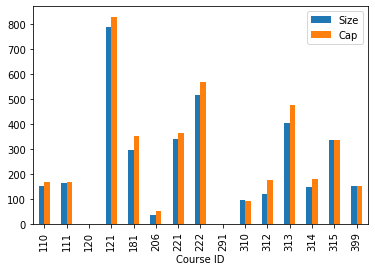

In [13]:
# Create bar graph of enrollment distributions
df = pd.read_csv('ClassEnrollment.csv')
df.describe()
df.groupby("Course ID")[['Size', 'Cap']].sum().plot.bar()